# Solving Van der Pol oscillator with `SciPy`

In [2]:
from scipy.integrate import solve_ivp
import numpy as np

In [7]:
import matplotlib.pyplot as plt

## Van der Pol oscillator:
https://en.wikipedia.org/wiki/Van_der_Pol_oscillator
$$\frac{d^2x}{dt^2}-\mu(1-x^2)\frac{dx}{dt}+x=0$$

## refactoring
The formula of Van der Pol oscillator is a second order differential equation, which is not convenient as the input of the ode solver from `scipy`. We need to refactor it into two first order differntial equations by introducing an auxilliary variable $z$.

$$z = \frac{dx}{dt}$$

$$\frac{dz}{dt} - \mu (1 - x^2) z + x = 0$$

Then we can use this system of two odes as the input of the ode solver. The system is represented by a function that take $[z, x]$ at time $t$ as input and returns an array of $[\frac{dz}{dt}, \frac{dx}{dt}]$, aka $[\frac{dz}{dt}, z]$, which is the differential at time $t$. 

In [4]:
def vdp(t, y, mu):
    z = y[0]
    x = y[1]
    dzdt = mu * (1-x**2) * z - x
    
    return [dzdt, z]

In [3]:
help(solve_ivp)    

Help on function solve_ivp in module scipy.integrate._ivp.ivp:

solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, **options)
    Solve an initial value problem for a system of ODEs.
    
    This function numerically integrates a system of ordinary differential
    equations given an initial value::
    
        dy / dt = f(t, y)
        y(t0) = y0
    
    Here t is a one-dimensional independent variable (time), y(t) is an
    n-dimensional vector-valued function (state), and an n-dimensional
    vector-valued function f(t, y) determines the differential equations.
    The goal is to find y(t) approximately satisfying the differential
    equations, given an initial value y(t0)=y0.
    
    Some of the solvers support integration in the complex domain, but note that
    for stiff ODE solvers, the right-hand side must be complex-differentiable
    (satisfy Cauchy-Riemann equations [11]_). To solve a problem in the complex
    doma

In [16]:
tspan = [0, 10]
y0 = [7, 5]
mu = 0.1
sol = solve_ivp(lambda t,y: vdp(t, y, mu), tspan, y0, t_eval=[10])

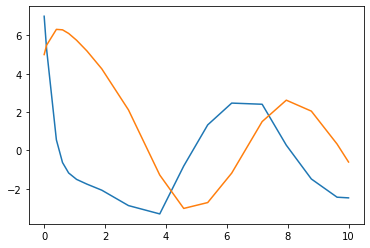

In [14]:
plt.plot(sol.t, sol.y[0,:], sol.t, sol.y[1,:])

In [15]:
sol.y[:,-1]

array([-2.47401738, -0.60380478])

In [17]:
sol.y

array([[-2.47401738],
       [-0.60380478]])